Import der benötigten Module. Das Modul "ecgdetectors" wird zuerst heruntergeladen und installiert.

In [2]:
#from google.colab import files
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy
import hrv

#!pip install py-ecg-detectors
from ecgdetectors import Detectors

import preprocess

Hauptteil des Codes: Berechnung der Features für alle EKG-Daten und zuordnung zu Normal / Vorhofflimmern

In [3]:
silence_warnings=True
fs = 300                                                  # Sampling-Frequenz 300 Hz
hrz = hrv.HRV(fs)
detectors = Detectors(fs)                                 # Initialisierung des QRS-Detektors
sdnn_normal = np.array([])                                # Initialisierung der Feature-Arrays
sdnn_afib = np.array([])
mdnn_normal = np.array([])
mdnn_afib = np.array([])
rrskew_normal = np.array([])
rrskew_afib = np.array([])
rrkurt_normal = np.array([])
rrkurt_afib = np.array([])
sdsd_normal = np.array([])
sdsd_afib = np.array([])
hr_normal = np.array([])
hr_afib = np.array([])
rmssd_normal = np.array([])
rmssd_afib = np.array([])
sdann_normal = np.array([])
sdann_afib = np.array([])
pNN20_normal = np.array([])
pNN20_afib = np.array([])
pNN50_normal = np.array([])
pNN50_afib = np.array([])
NN20_normal = np.array([])
NN20_afib = np.array([])
NN50_normal = np.array([])
NN50_afib = np.array([])
with open('training/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
      data = sio.loadmat('training/'+row[0]+'.mat')   # Import der EKG-Dateien
      ecg_lead = data['val'][0]
      ecg_lead = preprocess.ecg_denoise_kalman(ecg_lead)
      r_peaks = detectors.pan_tompkins_detector(ecg_lead)     # Detektion der QRS-Komplexe
      #print(len(r_peaks))
      sdnn = np.std(np.diff(r_peaks)/fs*1000) 
      mdnn = np.mean(np.diff(r_peaks)/fs*1000)            # Berechnung der Standardabweichung der Schlag-zu-Schlag Intervalle (SDNN) in Millisekunden
      rrskew = scipy.stats.skew(np.diff(r_peaks)/fs*1000)
      rrkurt = scipy.stats.kurtosis(np.diff(r_peaks)/fs*1000)
      sdsd = hrz.SDSD(r_peaks)
      hr = hrz.HR(r_peaks)
      rmssd = hrz.RMSSD(r_peaks)
      if len(r_peaks)>1:
        pNN20 = hrz.pNN20(r_peaks)
        pNN50 = hrz.pNN50(r_peaks)
      else:
        pNN20 = np.nan
        pNN50 = np.nan
      NN20 = hrz.NN20(r_peaks)
      NN50 = hrz.NN50(r_peaks)
      #sdann = hrz.SDANN(r_peaks)
      if row[1]=='N':
        sdnn_normal = np.append(sdnn_normal,sdnn)         # Zuordnung zu "Normal"
        mdnn_normal = np.append(mdnn_normal, mdnn)
        rrskew_normal = np.append(rrskew_normal, rrskew)
        rrkurt_normal = np.append(rrkurt_normal, rrkurt)
        sdsd_normal = np.append(sdsd_normal, sdsd)
        hr_normal = np.append(hr_normal, hr)
        rmssd_normal = np.append(rmssd_normal, rmssd)
        pNN20_normal = np.append(pNN20_normal, pNN20)
        pNN50_normal = np.append(pNN50_normal, pNN50)
        NN20_normal = np.append(NN20_normal, NN20)
        NN50_normal = np.append(NN50_normal, NN50)
        #sdann_normal = np.append(sdann_normal, sdann)
      if row[1]=='A':
        sdnn_afib = np.append(sdnn_afib,sdnn)             # Zuordnung zu "Vorhofflimmern"
        mdnn_afib = np.append(mdnn_afib, mdnn)
        rrskew_afib = np.append(rrskew_afib, rrskew)
        rrkurt_afib = np.append(rrkurt_afib, rrkurt)
        sdsd_afib = np.append(sdsd_afib, sdsd)
        hr_afib = np.append(hr_afib, hr)
        rmssd_afib = np.append(rmssd_afib, rmssd)
        pNN20_afib = np.append(pNN20_afib, pNN20)
        pNN50_afib = np.append(pNN50_afib, pNN50)
        NN20_afib = np.append(NN20_afib, NN20)
        NN50_afib = np.append(NN50_afib, NN50)
        #sdann_afib = np.append(sdann_afib, sdann)
      line_count = line_count + 1
      if (line_count % 100)==0:
        print(str(line_count) + "\t Dateien wurden verarbeitet.")

100	 Dateien wurden verarbeitet.
200	 Dateien wurden verarbeitet.
300	 Dateien wurden verarbeitet.


c:\Users\Stefan\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Stefan\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\Stefan\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Stefan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Stefan\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


400	 Dateien wurden verarbeitet.
500	 Dateien wurden verarbeitet.
600	 Dateien wurden verarbeitet.
700	 Dateien wurden verarbeitet.
800	 Dateien wurden verarbeitet.
900	 Dateien wurden verarbeitet.
1000	 Dateien wurden verarbeitet.
1100	 Dateien wurden verarbeitet.
1200	 Dateien wurden verarbeitet.


c:\Users\Stefan\anaconda3\lib\site-packages\scipy\stats\stats.py:1107: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
c:\Users\Stefan\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\Stefan\anaconda3\lib\site-packages\scipy\stats\stats.py:1216: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)


1300	 Dateien wurden verarbeitet.
1400	 Dateien wurden verarbeitet.
1500	 Dateien wurden verarbeitet.
1600	 Dateien wurden verarbeitet.
1700	 Dateien wurden verarbeitet.
1800	 Dateien wurden verarbeitet.
1900	 Dateien wurden verarbeitet.
2000	 Dateien wurden verarbeitet.
2100	 Dateien wurden verarbeitet.
2200	 Dateien wurden verarbeitet.
2300	 Dateien wurden verarbeitet.
2400	 Dateien wurden verarbeitet.
2500	 Dateien wurden verarbeitet.
2600	 Dateien wurden verarbeitet.
2700	 Dateien wurden verarbeitet.
2800	 Dateien wurden verarbeitet.
2900	 Dateien wurden verarbeitet.
3000	 Dateien wurden verarbeitet.
3100	 Dateien wurden verarbeitet.
3200	 Dateien wurden verarbeitet.
3300	 Dateien wurden verarbeitet.
3400	 Dateien wurden verarbeitet.
3500	 Dateien wurden verarbeitet.
3600	 Dateien wurden verarbeitet.
3700	 Dateien wurden verarbeitet.
3800	 Dateien wurden verarbeitet.
3900	 Dateien wurden verarbeitet.
4000	 Dateien wurden verarbeitet.
4100	 Dateien wurden verarbeitet.
4200	 Dateien 

In [4]:
print(sdsd_normal)

[118.3724505  286.72932669 261.32400519 ...  78.46405225 188.58013982
  93.36126814]


Visualisierung der Features

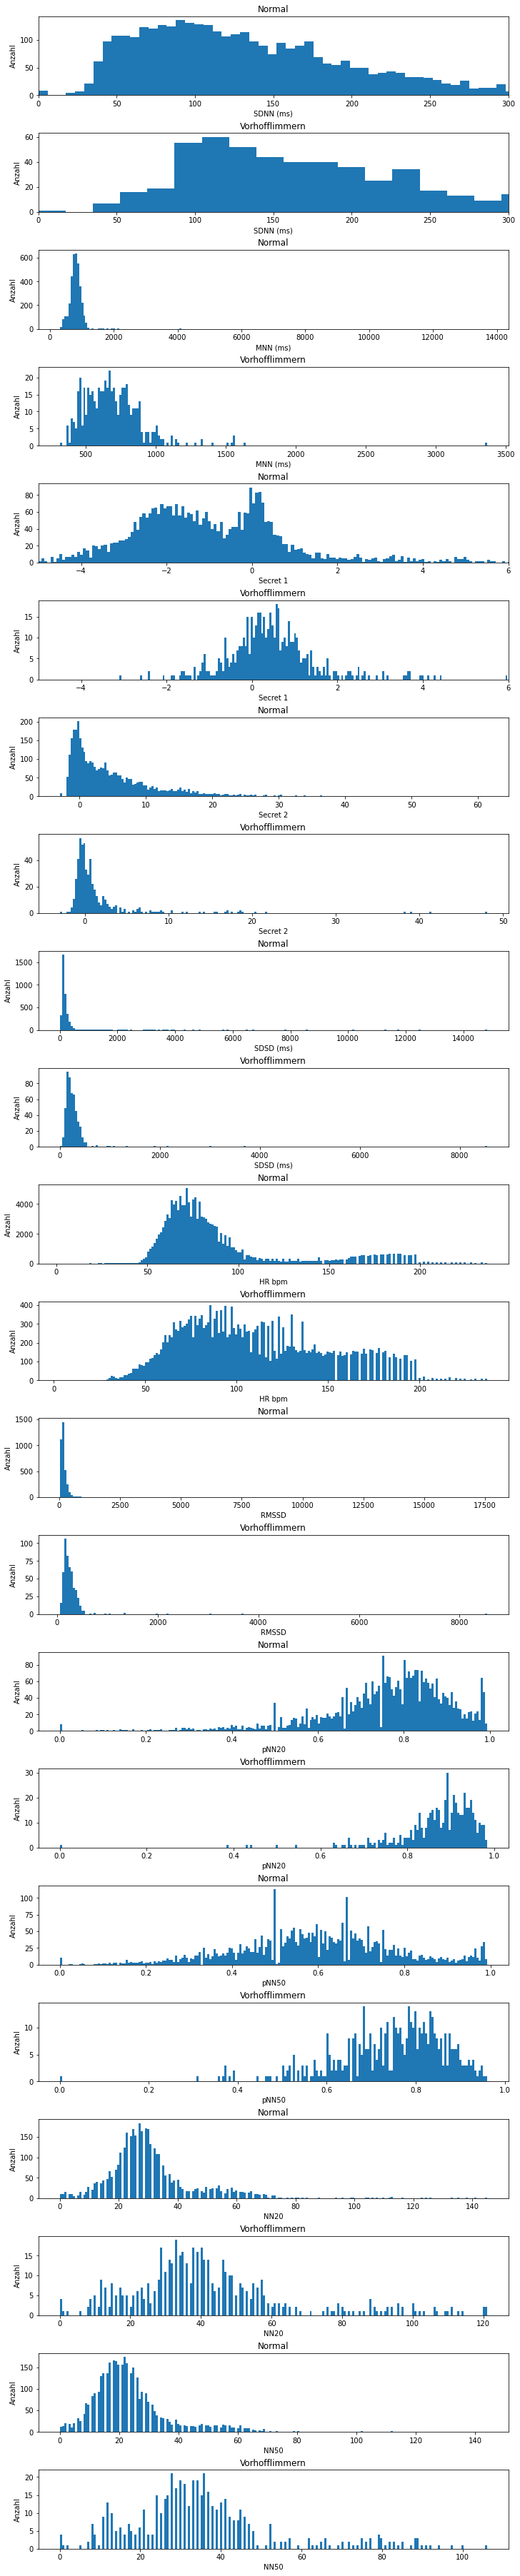

In [41]:
fig, axs = plt.subplots(22,1, constrained_layout=True, figsize=(10,50))
axs[0].hist(sdnn_normal,2000)
axs[0].set_xlim([0, 300])
axs[0].set_title("Normal")
axs[0].set_xlabel("SDNN (ms)")
axs[0].set_ylabel("Anzahl")

axs[1].hist(sdnn_afib,300)
axs[1].set_xlim([0, 300])
axs[1].set_title("Vorhofflimmern")
axs[1].set_xlabel("SDNN (ms)")
axs[1].set_ylabel("Anzahl")


axs[2].hist(mdnn_normal,200)
#axs[2].set_xlim([0, 1500])
axs[2].set_title("Normal")
axs[2].set_xlabel("MNN (ms)")
axs[2].set_ylabel("Anzahl")

axs[3].hist(mdnn_afib,200)
#axs[3].set_xlim([0, 1500])
axs[3].set_title("Vorhofflimmern")
axs[3].set_xlabel("MNN (ms)")
axs[3].set_ylabel("Anzahl")

axs[4].hist(rrskew_normal,200)
axs[4].set_xlim([-5, 6])
axs[4].set_title("Normal")
axs[4].set_xlabel("Secret 1")
axs[4].set_ylabel("Anzahl")

axs[5].hist(rrskew_afib,200)
axs[5].set_xlim([-5, 6])
axs[5].set_title("Vorhofflimmern")
axs[5].set_xlabel("Secret 1")
axs[5].set_ylabel("Anzahl")

axs[6].hist(rrkurt_normal,200)
#axs[6].set_xlim([0, 1500])
axs[6].set_title("Normal")
axs[6].set_xlabel("Secret 2")
axs[6].set_ylabel("Anzahl")

axs[7].hist(rrkurt_afib,200)
#axs[7].set_xlim([0, 1500])
axs[7].set_title("Vorhofflimmern")
axs[7].set_xlabel("Secret 2")
axs[7].set_ylabel("Anzahl")

axs[8].hist(sdsd_normal,200)
#axs[8].set_xlim([0, 1500])
axs[8].set_title("Normal")
axs[8].set_xlabel("SDSD (ms)")
axs[8].set_ylabel("Anzahl")

axs[9].hist(sdsd_afib,200)
#axs[9].set_xlim([0, 1500])
axs[9].set_title("Vorhofflimmern")
axs[9].set_xlabel("SDSD (ms)")
axs[9].set_ylabel("Anzahl")

axs[10].hist(hr_normal,200)
#axs[10].set_xlim([0, 1500])
axs[10].set_title("Normal")
axs[10].set_xlabel("HR bpm")
axs[10].set_ylabel("Anzahl")

axs[11].hist(hr_afib,200)
#axs[11].set_xlim([0, 1500])
axs[11].set_title("Vorhofflimmern")
axs[11].set_xlabel("HR bpm")
axs[11].set_ylabel("Anzahl")

axs[12].hist(rmssd_normal,200)
#axs[12].set_xlim([0, 1500])
axs[12].set_title("Normal")
axs[12].set_xlabel("RMSSD")
axs[12].set_ylabel("Anzahl")

axs[13].hist(rmssd_afib,200)
#axs[13].set_xlim([0, 1500])
axs[13].set_title("Vorhofflimmern")
axs[13].set_xlabel("RMSSD")
axs[13].set_ylabel("Anzahl")

axs[14].hist(pNN20_normal,200)
#axs[14].set_xlim([0, 1500])
axs[14].set_title("Normal")
axs[14].set_xlabel("pNN20")
axs[14].set_ylabel("Anzahl")

axs[15].hist(pNN20_afib,200)
#axs[15].set_xlim([0, 1500])
axs[15].set_title("Vorhofflimmern")
axs[15].set_xlabel("pNN20")
axs[15].set_ylabel("Anzahl")

axs[16].hist(pNN50_normal,200)
#axs[16].set_xlim([0, 1500])
axs[16].set_title("Normal")
axs[16].set_xlabel("pNN50")
axs[16].set_ylabel("Anzahl")

axs[17].hist(pNN50_afib,200)
#axs[17].set_xlim([0, 1500])
axs[17].set_title("Vorhofflimmern")
axs[17].set_xlabel("pNN50")
axs[17].set_ylabel("Anzahl")

axs[18].hist(NN20_normal,200)
#axs[18].set_xlim([0, 1500])
axs[18].set_title("Normal")
axs[18].set_xlabel("NN20")
axs[18].set_ylabel("Anzahl")

axs[19].hist(NN20_afib,200)
#axs[19].set_xlim([0, 1500])
axs[19].set_title("Vorhofflimmern")
axs[19].set_xlabel("NN20")
axs[19].set_ylabel("Anzahl")

axs[20].hist(NN50_normal,200)
#axs[20].set_xlim([0, 1500])
axs[20].set_title("Normal")
axs[20].set_xlabel("NN50")
axs[20].set_ylabel("Anzahl")

axs[21].hist(NN50_afib,200)
#axs[21].set_xlim([0, 1500])
axs[21].set_title("Vorhofflimmern")
axs[21].set_xlabel("NN50")
axs[21].set_ylabel("Anzahl")

plt.show()

Bestimmung des optimalen Schwellwertes anhand des F1-Scores

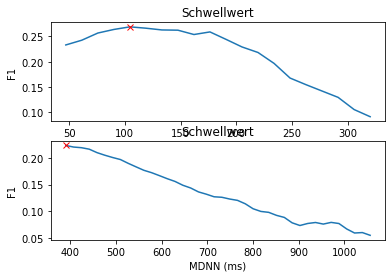

In [6]:
sdnn_total = np.append(sdnn_normal,sdnn_afib) # Kombination der beiden SDNN-Listen
p05 = np.nanpercentile(sdnn_total,5)          # untere Schwelle
p95 = np.nanpercentile(sdnn_total,95)         # obere Schwelle
thresholds_s = np.linspace(p05, p95, num=20)    # Liste aller möglichen Schwellwerte
F1_s = np.array([])
for th in thresholds_s:
  TP = np.sum(sdnn_afib>=th)                  # Richtig Positiv
  TN = np.sum(sdnn_normal<th)                 # Richtig Negativ
  FP = np.sum(sdnn_normal>=th)                # Falsch Positiv
  FN = np.sum(sdnn_afib<th)                   # Falsch Negativ
  F1_s = np.append(F1_s, TP / (TP + 1/2*(FP+FN))) # Berechnung des F1-Scores

th_opt_s=thresholds_s[np.argmax(F1_s)]              # Bestimmung des Schwellwertes mit dem höchsten F1-Score

mdnn_total = np.append(mdnn_normal,mdnn_afib) # Kombination der beiden MDNN-Listen
p05 = np.nanpercentile(mdnn_total,1)          # untere Schwelle
p95 = np.nanpercentile(mdnn_total,95)         # obere Schwelle
thresholds_m = np.linspace(p05, p95, num=40)    # Liste aller möglichen Schwellwerte
F1_m = np.array([])
for th in thresholds_m:
  TP = np.sum(mdnn_afib>=th)                  # Richtig Positiv
  TN = np.sum(mdnn_normal<th)                 # Richtig Negativ
  FP = np.sum(mdnn_normal>=th)                # Falsch Positiv
  FN = np.sum(mdnn_afib<th)                   # Falsch Negativ
  F1_m = np.append(F1_m, TP / (TP + 1/2*(FP+FN))) # Berechnung des F1-Scores

th_opt_m=thresholds_m[np.argmax(F1_m)]              # Bestimmung des Schwellwertes mit dem höchsten F1-Score

fig, ax = plt.subplots(2,1)
ax[0].plot(thresholds_s,F1_s)
ax[0].plot(th_opt_s,F1_s[np.argmax(F1_s)],'xr')
ax[0].set_title("Schwellwert")
ax[0].set_xlabel("SDNN (ms)")
ax[0].set_ylabel("F1")

ax[1].plot(thresholds_m,F1_m)
ax[1].plot(th_opt_m,F1_m[np.argmax(F1_m)],'xr')
ax[1].set_title("Schwellwert")
ax[1].set_xlabel("MDNN (ms)")
ax[1].set_ylabel("F1")
plt.show()

Visualisierung der Daten + Schwellwert

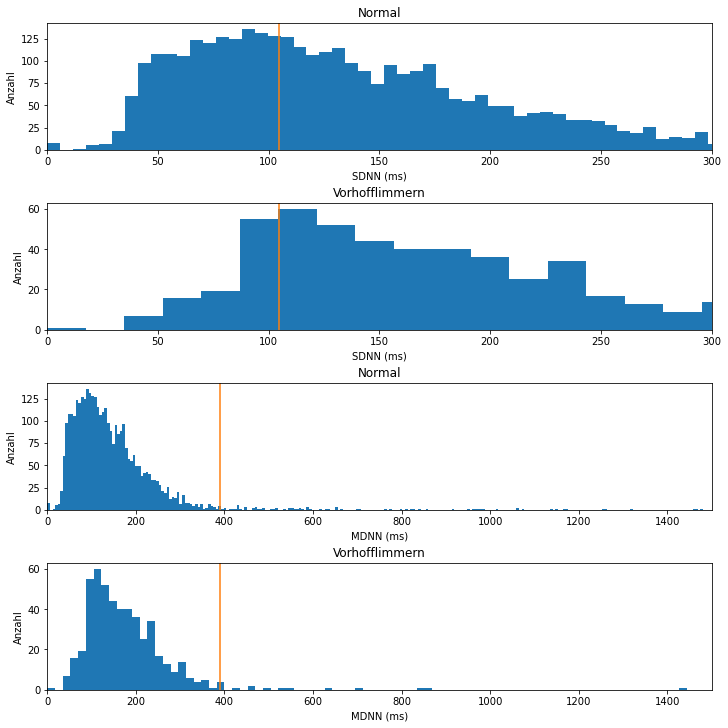

In [7]:
fig, axs = plt.subplots(4,1, constrained_layout=True, figsize=(10,10))
axs[0].hist(sdnn_normal,2000)
axs[0].set_xlim([0, 300])
tmp = axs[0].get_ylim()
axs[0].plot([th_opt_s,th_opt_s],[0,10000])
axs[0].set_ylim(tmp)
axs[0].set_title("Normal")
axs[0].set_xlabel("SDNN (ms)")
axs[0].set_ylabel("Anzahl")

axs[1].hist(sdnn_afib,300)
axs[1].set_xlim([0, 300])
tmp = axs[1].get_ylim()
axs[1].plot([th_opt_s,th_opt_s],[0,10000])
axs[1].set_ylim(tmp)
axs[1].set_title("Vorhofflimmern")
axs[1].set_xlabel("SDNN (ms)")
axs[1].set_ylabel("Anzahl")

axs[2].hist(sdnn_normal,2000)
axs[2].set_xlim([0, 1500])
tmp = axs[2].get_ylim()
axs[2].plot([th_opt_m,th_opt_m],[0,10000])
axs[2].set_ylim(tmp)
axs[2].set_title("Normal")
axs[2].set_xlabel("MDNN (ms)")
axs[2].set_ylabel("Anzahl")

axs[3].hist(sdnn_afib,300)
axs[3].set_xlim([0, 1500])
tmp = axs[3].get_ylim()
axs[3].plot([th_opt_m,th_opt_m],[0,10000])
axs[3].set_ylim(tmp)
axs[3].set_title("Vorhofflimmern")
axs[3].set_xlabel("MDNN (ms)")
axs[3].set_ylabel("Anzahl")

plt.show()

fs = 300                                                  # Sampling-Frequenz 300 Hz
detectors_t = Detectors(fs)                                 # Initialisierung des QRS-Detektors
sdnn_normal_t = np.array([])                                # Initialisierung der Feature-Arrays
sdnn_afib_t = np.array([])
mdnn_normal_t = np.array([])
mdnn_afib_t = np.array([])
with open('test/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row_t in csv_reader:
      data_t = sio.loadmat('test/'+row[0]+'.mat')   # Import der EKG-Dateien
      ecg_lead_t = data_t['val'][0]
      r_peaks_t = detectors.hamilton_detector(ecg_lead_t)     # Detektion der QRS-Komplexe
      sdnn_t = np.std(np.diff(r_peaks_t)/fs*1000) 
      mdnn_t = np.mean(np.diff(r_peaks_t)/fs*1000)            # Berechnung der Standardabweichung der Schlag-zu-Schlag Intervalle (SDNN) in Millisekunden
      if row_t[1]=='N':
        sdnn_normal_t = np.append(sdnn_normal_t,sdnn_t)         # Zuordnung zu "Normal"
        mdnn_normal_t = np.append(mdnn_normal_t, mdnn_t)
      if row_t[1]=='A':
        sdnn_afib_t = np.append(sdnn_afib_t,sdnn_t)             # Zuordnung zu "Vorhofflimmern"
        mdnn_afib_t = np.append(mdnn_afib_t, mdnn_t)
      line_count = line_count + 1
      if (line_count % 2)==0:
        print(str(line_count) + "\t Dateien wurden verarbeitet.")

In [8]:
from sklearn import tree

In [9]:

import random
train_feat_n = list(zip(sdnn_normal, mdnn_normal, rrskew_normal, rrkurt_normal, sdsd_normal, hr_normal, rmssd_normal, pNN20_normal, pNN50_normal, NN20_normal, NN50_normal))
train_feat_n = list(zip(train_feat_n, [0]*len(train_feat_n)))
random.shuffle(train_feat_n)
test_feat_n = train_feat_n[int(0.8*len(train_feat_n)):len(train_feat_n)]
train_feat_n = train_feat_n[0:int(0.8*len(train_feat_n))]
train_feat_a = list(zip(sdnn_afib, mdnn_afib, rrskew_afib, rrkurt_afib, sdsd_afib, hr_afib, rmssd_afib, pNN20_afib, pNN50_afib, NN20_afib, NN50_afib))
train_feat_a = list(zip(train_feat_a, [1]*len(train_feat_n)))
random.shuffle(train_feat_a)
test_feat_a = train_feat_a[int(0.8*len(train_feat_a)):len(train_feat_a)]
train_feat_a = train_feat_a[0:int(0.8*len(train_feat_a))]
train_feat = train_feat_a + train_feat_n
test_feat = test_feat_a + test_feat_n
random.shuffle(train_feat)
random.shuffle(test_feat)
train_feat = np.array(train_feat)
test_feat = np.array(test_feat)
X = np.array(list(train_feat[:,0]), dtype='float32')
Y = np.array(list(train_feat[:,1]), dtype='float32')
X_test = np.array(list(test_feat[:,0]), dtype='float32')
Y_test = np.array(list(test_feat[:,1]), dtype='float32')
print(X)
#print(Y)
print(X.shape)
print(Y.shape)
print(X_test.shape, Y_test.shape)
print(X.dtype)


[[ 6.6225677e+01  6.9063495e+02  1.8329887e-01 ...  7.6190478e-01
   3.6000000e+01  3.2000000e+01]
 [ 1.5711211e+02  4.9758621e+02  3.8861987e-01 ...  9.8275864e-01
   5.7000000e+01  5.7000000e+01]
 [ 2.7320648e+02  8.0539685e+02 -7.4743581e-01 ...  6.6666669e-01
   1.5000000e+01  1.4000000e+01]
 ...
 [ 1.1884677e+02  7.2400000e+02 -2.4249783e+00 ...  2.5000000e-01
   1.5000000e+01  1.0000000e+01]
 [ 7.5812469e+01  8.0555554e+02  9.0981448e-01 ...  6.1111110e-01
   2.7000000e+01  2.2000000e+01]
 [ 1.2214908e+02  4.5588541e+02  4.9137920e-01 ...  9.5312500e-01
   6.3000000e+01  6.1000000e+01]]
(3280, 11)
(3280,)
(822, 11) (822,)
float32


C:\Users\Stefan\AppData\Local\Temp\ipykernel_30508\205497224.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_feat = np.array(train_feat)
C:\Users\Stefan\AppData\Local\Temp\ipykernel_30508\205497224.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_feat = np.array(test_feat)


In [10]:
nans = np.where(np.isfinite(X)==False)
print(nans)
X = np.delete(X, nans, axis=0)
Y = np.delete(Y, nans)
print(X[np.where(np.isfinite(X)==False)])
print(X.shape, Y.shape)
nans_t = np.where(np.isfinite(X_test)==False)
print(nans_t)
X_test = np.delete(X_test, nans_t, axis=0)
Y_test= np.delete(Y_test, nans_t)

(array([  19,   19,  346,  346,  346,  346,  346,  346,  346,  346,  357,
        357,  357,  357,  357,  357,  357,  357,  631,  631,  800,  800,
        969,  969, 1447, 1447, 1874, 1874, 2008, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2092, 2092, 2092, 2092, 2092, 2092, 2092, 2092,
       2171, 2171, 2171, 2171, 2171, 2171, 2171, 2171, 3098, 3098],
      dtype=int64), array([4, 6, 0, 1, 2, 3, 4, 6, 7, 8, 0, 1, 2, 3, 4, 6, 7, 8, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 0, 1, 2, 3, 4, 6, 7, 8, 0, 1, 2, 3, 4, 6, 7, 8,
       0, 1, 2, 3, 4, 6, 7, 8, 4, 6], dtype=int64))
[]
(3260, 11) (3260,)
(array([654, 654, 685, 685], dtype=int64), array([4, 6, 4, 6], dtype=int64))


In [11]:
clf = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=4)
clf = clf.fit(X, Y)
clf.score(X_test, Y_test)

0.7799511002444988

In [19]:
import pickle
loaded_model = pickle.load(open('tree_model.sav', 'rb'))
dot_data = tree.export_graphviz(loaded_model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("ECG")
clf = loaded_model

'ECG.pdf'

In [35]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("ECG") 

'ECG.pdf'

In [36]:
from sklearn.ensemble import RandomForestClassifier

feature_names = ['SDNN', 'MNN', 'Secret 1', 'Secret 2', 'SDSD', 'HR', 'RMSSD', 'pNN20', 'pNN50', 'NN20', 'NN50'] #[f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0, class_weight='balanced')
forest.fit(X, Y)
forest.score(X_test, Y_test)

0.941320293398533

In [37]:
from sklearn.inspection import permutation_importance
import time
import pandas as pd

start_time = time.time()
result = permutation_importance(
    forest, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 2.243 seconds


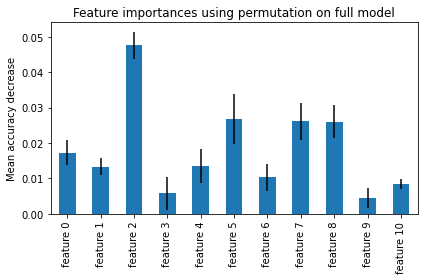

In [15]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [38]:
start_time = time.time()
importances = clf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.001 seconds


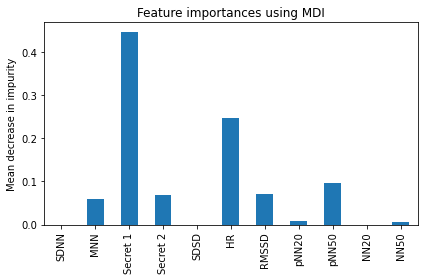

In [39]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [25]:
frm = pd.DataFrame(X)
lbl = pd.DataFrame(Y)
frm = pd.concat([frm, lbl], axis=1)
frm.set_axis(['SDNN', 'MDNN', 'Skewness', 'Kurtosis', 'SDSD', 'HR', 'RMSSD', 'pNN20', 'pNN50', 'NN20', 'NN50', 'AFIB'], inplace=True, axis=1)
print(frm)
print(X[np.where(X==np.max(X))])

            SDNN        MDNN  Skewness  Kurtosis        SDSD          HR  \
0     144.216629  703.750000 -1.705094  1.747606   90.984734   57.507988   
1     145.630920  696.984131 -0.728884  0.573815  176.577286   89.552238   
2     198.193604  870.000000 -2.081182  3.222843  172.858337  100.558662   
3     115.206367  751.333313 -1.380389  3.346508  142.802185   56.782333   
4      49.602501  832.857117 -0.683667  0.808303   77.763084   67.669174   
...          ...         ...       ...       ...         ...         ...   
3255  246.008759  662.045471 -0.164973 -1.414022  315.570312   70.038910   
3256  252.351486  632.971008  0.489999  0.293861  323.945709   81.818184   
3257  118.846771  724.000000 -2.424978  5.493984  128.732986   82.568810   
3258   75.812469  805.555542  0.909814  1.596937  115.224953   83.333336   
3259  122.149078  455.885406  0.491379 -0.942604  223.458176  174.757278   

           RMSSD     pNN20     pNN50  NN20  NN50  AFIB  
0      96.228897  0.875000  0.

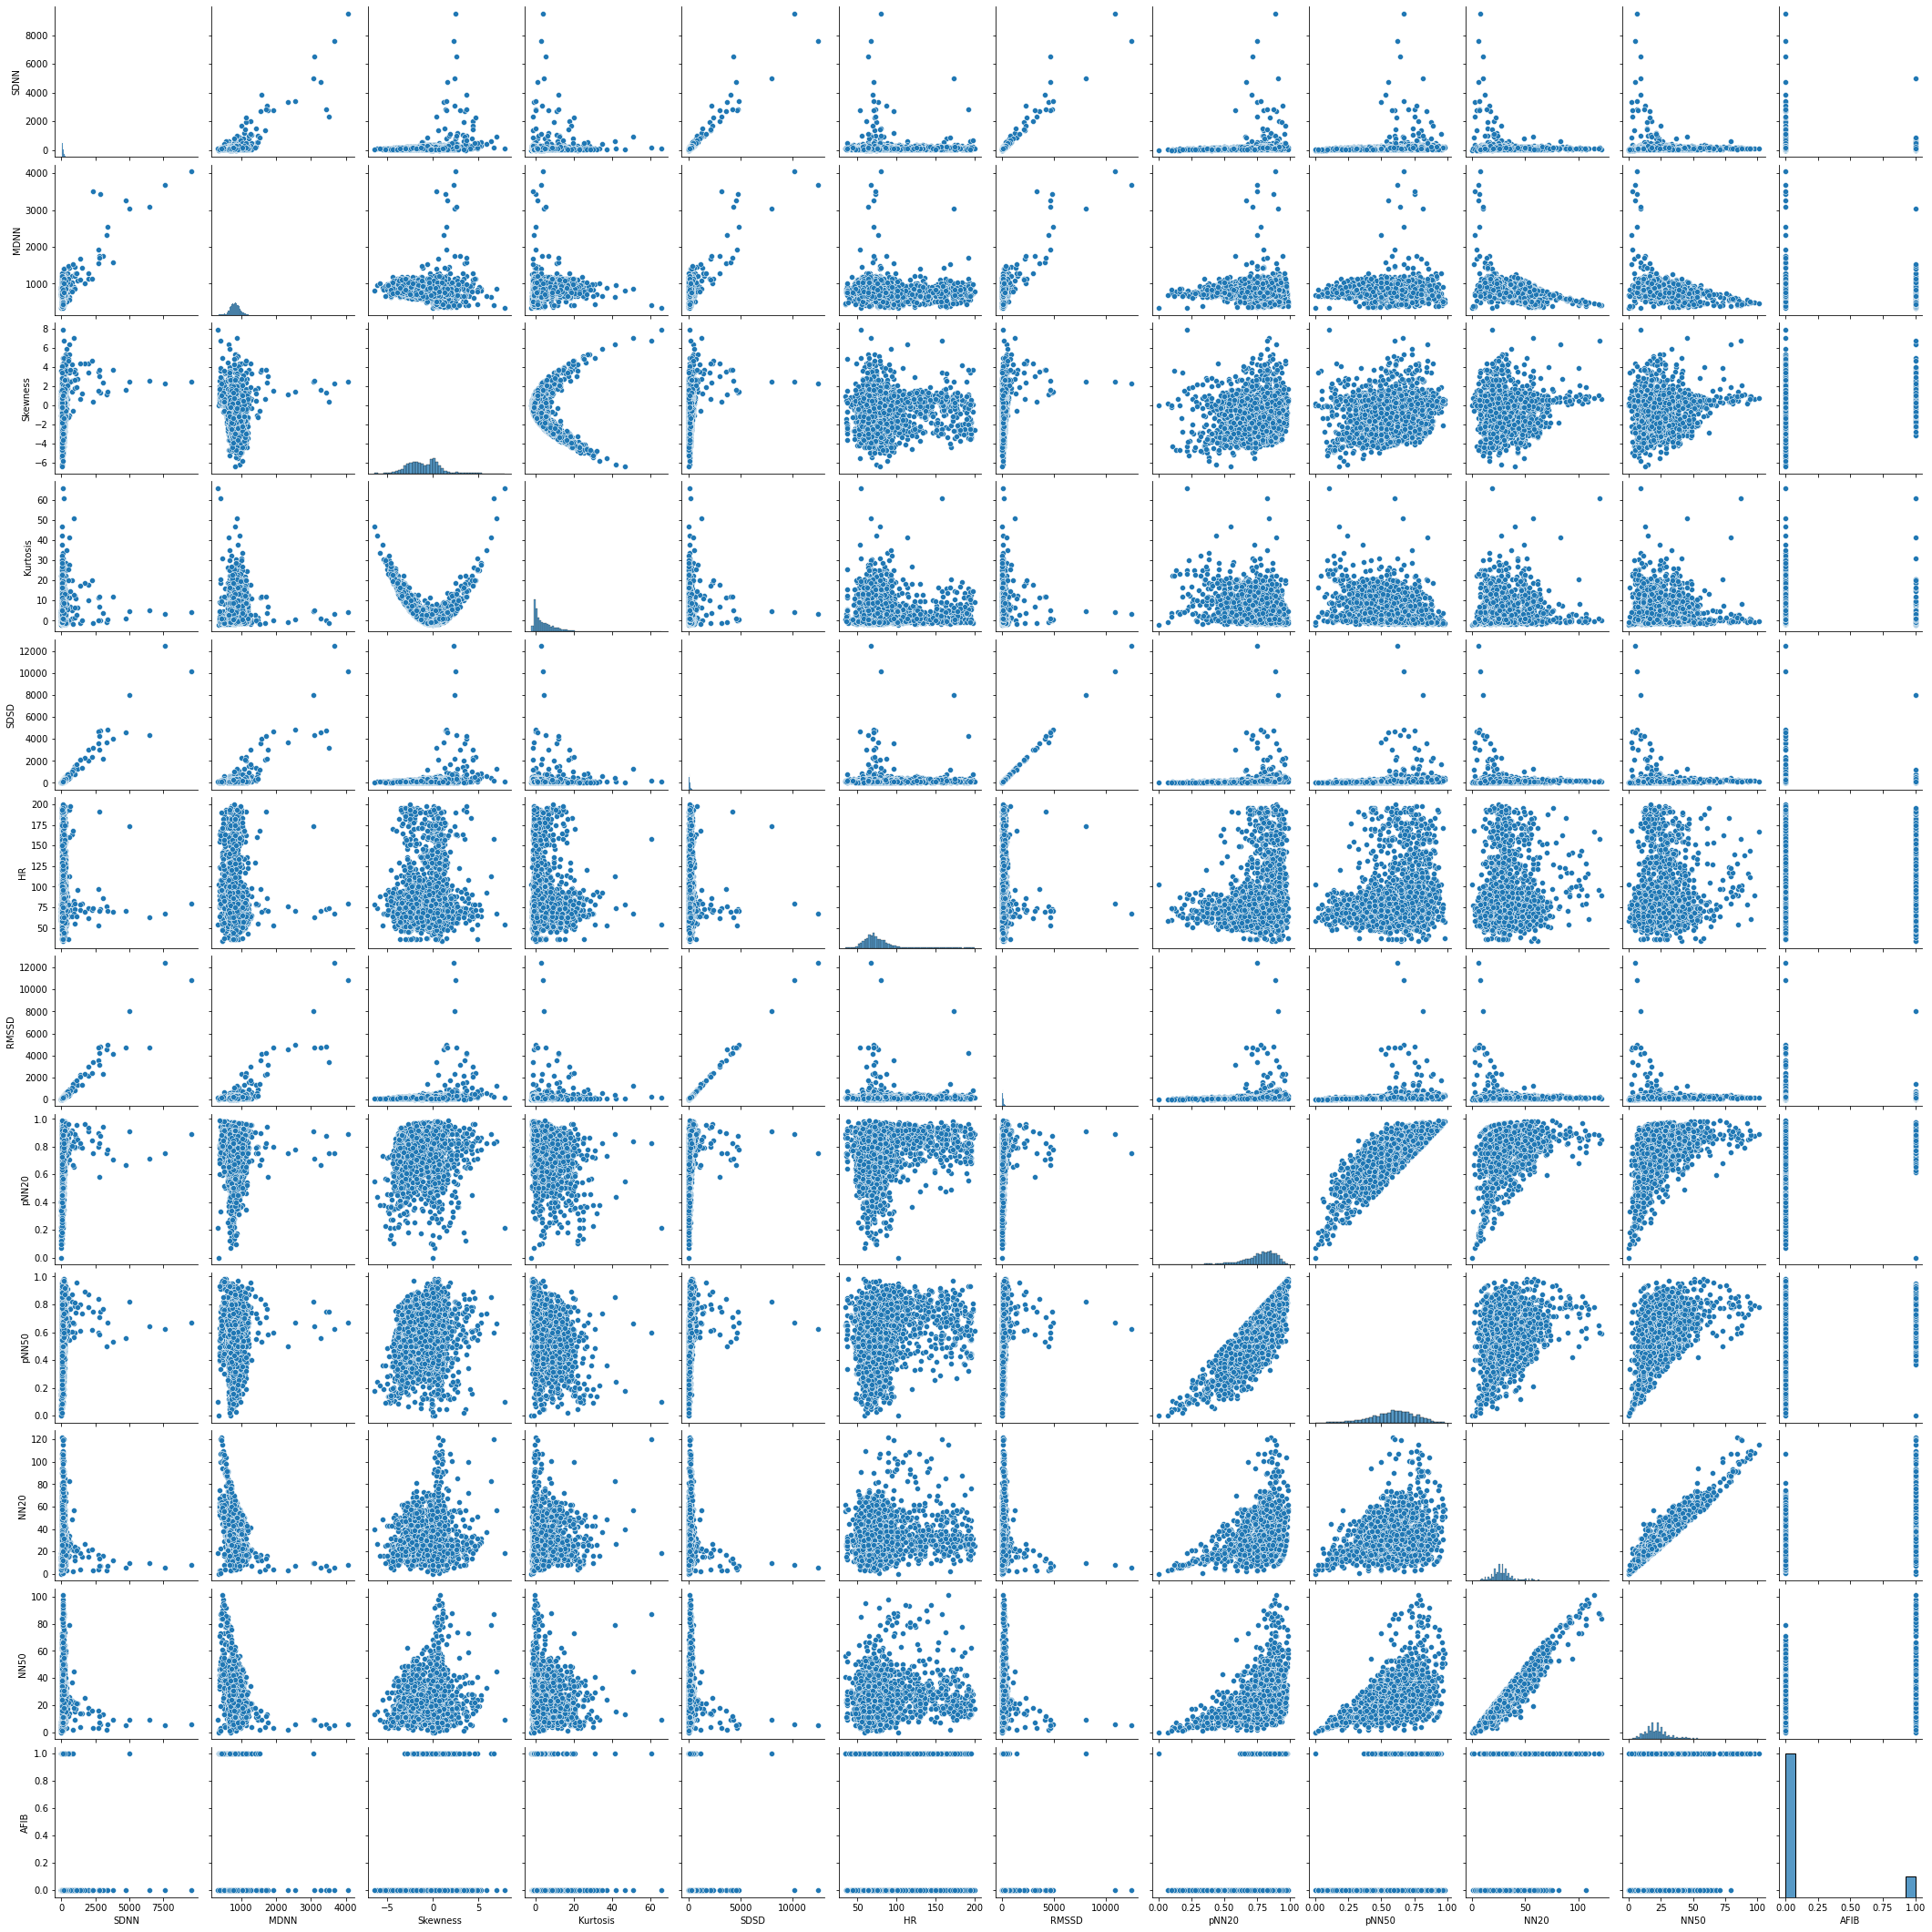

In [ ]:
import seaborn as sns
sns.pairplot(frm)

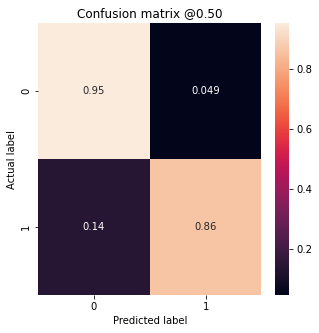

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p, normalize='true')
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True)
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

plot_cm(Y_test, clf.predict(X_test))

In [ ]:
import pickle
filename = 'tree_model.sav'
#pickle.dump(clf, open(filename, 'wb'))

In [ ]:
predX = clf.predict(X)
print(len(Y))
print(len(X))
predu = list(zip(Y, predX))
predu

3268
3268


[(0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),

In [ ]:
from predict import predict_labels
from wettbewerb import load_references, save_predictions
import argparse
import time

#parser = argparse.ArgumentParser(description='Predict given Model')
#parser.add_argument('--test_dir', action='store',type=str,default='../test/')
#parser.add_argument('--model_name', action='store',type=str,default='tree_model.sav')
#args = parser.parse_args()

ecg_leads,ecg_labels,fs,ecg_names = load_references('./test') # Importiere EKG-Dateien, zugehörige Diagnose, Sampling-Frequenz (Hz) und Name                                                # Sampling-Frequenz 300 Hz

start_time = time.time()
predictions = predict_labels(ecg_leads,fs,ecg_names,model_name='tree_model.sav')
pred_time = time.time()-start_time

save_predictions(predictions) # speichert Prädiktion in CSV Datei
print("Runtime",pred_time,"s")



2	 Dateien wurden geladen.
HELLO
[('ecg_hid_example_00001', 0.0), ('ecg_hid_example_00002', 0.0)]
2	 Labels wurden geschrieben.
Runtime 0.019761323928833008 s
